In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"promit007","key":"9eda611e72a0bcd843ec64f6c23afc56"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jainilcoder/netflix-stock-price-prediction

Dataset URL: https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction
License(s): CC0-1.0
  0% 0.00/20.9k [00:00<?, ?B/s]
100% 20.9k/20.9k [00:00<00:00, 33.2MB/s]


In [6]:
import zipfile
with zipfile.ZipFile('netflix-stock-price-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv('/content/data_folder/NFLX.csv')

In [9]:
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [10]:
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data = data[['Date', 'Close']]

In [13]:
data['Date'] = data['Date'].map(pd.Timestamp.timestamp)

In [14]:
X = data[['Date']]

In [15]:
y = data['Close']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3602.5036854809496
Root Mean Squared Error: 60.02086041936545
R-squared: 0.6910389761412103


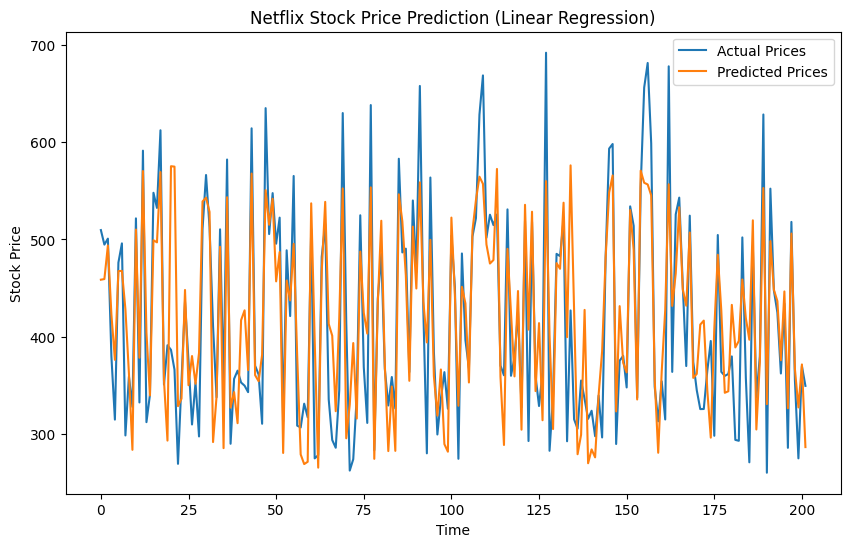

   Actual Prices  Predicted Prices
0     509.640015        458.712635


In [24]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Netflix Stock Price Prediction (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# Step 9: Print Actual and Predicted Values
# Print the first few actual and predicted values to compare them
comparison_df = pd.DataFrame({'Actual Prices': y_test.values, 'Predicted Prices': y_pred})
print(comparison_df.head(1))  # Display the first few rows for inspection


In [25]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the MAPE result
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Percentage Error (MAPE): 12.264910992551322%
